# Regression and Residual Analysis

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# special matplotlib argument for improved plots
%matplotlib inline 
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")

## Part 1: Linear Regression
### Purpose of linear regression
***
<div class="span5 alert alert-info">

<p> Given a dataset containing predictor variables $X$ and outcome/response variable $Y$, linear regression can be used to: </p>
<ul>
  <li> Build a <b>predictive model</b> to predict future values of $\hat{Y}$, using new data $X^*$ where $Y$ is unknown.</li>
  <li> Model the <b>strength of the relationship</b> between each independent variable $X_i$ and $Y$</li>
    <ul>
      <li> Many times, only a subset of independent variables $X_i$ will have a linear relationship with $Y$</li>
      <li> Need to figure out which $X_i$ contributes most information to predict $Y$ </li>
    </ul>
   <li>It is in many cases, the first pass prediction algorithm for continuous outcomes. </li>
</ul>
</div>

### A Brief Mathematical Recap
***

[Linear Regression](http://en.wikipedia.org/wiki/Linear_regression) is a method to model the relationship between a set of independent variables $X$ (also knowns as explanatory variables, features, predictors) and a dependent variable $Y$.  This method assumes the relationship between each predictor $X$ is **linearly** related to the dependent variable $Y$. The most basic linear regression model contains one independent variable $X$, we'll call this the **simple linear regression** model. 

$$ Y = \beta_0 + \beta_1 X + \epsilon$$

$\epsilon$ is considered the unobservable randomn _"noise"_, that adds uncertainty, chance or luck to a linear relationship. 

__In linear regression, $\epsilon$ **is assumed to be normally distributed with a mean of 0. This means then on average if we know $Y$, roughly an equal number of predictions $\hat{Y}$ will be above $Y$ and as below $Y$ ... Therefore, on average the error is zero.**__

The residuals, $\epsilon$ are also assumed to be **independently and identically distributed (IIE).** Independence means that the residuals are not correlated -- the residual from one prediction has no effect on the residual from another prediction. Correlated errors are common in time series analysis and spatial analyses.**

* **$\beta_0$ is the intercept** of the linear model and represents the average of $Y$ when all independent variables $X$ are set to 0.

* **$\beta_1$ is the slope of the line** associated with the regression model and represents the average effect of a one-unit increase in $X$ on $Y$.

* Back to the simple model. The model in linear regression is the *conditional mean* of $Y$ given the values in $X$ is expressed a linear function.  

$$ y = f(x) = E(Y | X = x)$$ 

![conditional mean](images/conditionalmean.png)
*Image from http://www.learner.org/courses/againstallodds/about/glossary.html. Note this image uses $\alpha$ and $\beta$ instead of $\beta_0$ and $\beta_1$.*

* The goal is to estimate the coefficients (e.g. $\beta_0$ and $\beta_1$). We represent the estimates of the coefficients with a "hat" on top of the letter.  

$$ \hat{\beta}_0, \hat{\beta}_1 $$

* Once we estimate the coefficients $\hat{\beta}_0$ and $\hat{\beta}_1$, we can use these to predict new values of $Y$ given new data $X$.

$$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1$$

* Multiple linear regression is when you have more than one independent variable and the estimation involves matrices
    * $X_1$, $X_2$, $X_3$, $\ldots$


* How do you estimate the coefficients? 
    * There are many ways to fit a linear regression model
    * The method called **least squares** is the most common methods
    * We will discuss least squares

$$ Y = \beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p + \epsilon$$ 
    
### Estimating $\hat\beta$: Least squares
***
[Least squares](http://en.wikipedia.org/wiki/Least_squares) is a method that can estimate the coefficients of a linear model by minimizing the squared residuals: 

$$ \mathscr{L} = \sum_{i=1}^N \epsilon_i^2 = \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2  = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

where $N$ is the number of observations and $\epsilon$ represents a residual or error, ACTUAL - PREDICTED.  

#### Estimating the intercept $\hat{\beta_0}$ for the simple linear model

We want to minimize the squared residuals and solve for $\hat{\beta_0}$ so we take the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta_0}$ 

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_0}} &= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= -2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \hspace{25mm} \mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N (y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i) \\
&= -2 \left[ \left( \sum_{i=1}^N y_i \right) - N \hat{\beta_0} - \hat{\beta}_1 \left( \sum_{i=1}^N x_i
\right) \right] \\
& 2 \left[ N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i \right] = 0 \hspace{20mm} \mbox{(Set equal to 0 and solve for $\hat{\beta}_0$)} \\
& N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i = 0 \\
& N \hat{\beta}_0 = \sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i}{N} \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i}{N} - \hat{\beta}_1 \frac{\sum_{i=1}^N x_i}{N} \\
& \boxed{\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}}
\end{align}
$

Using this new information, we can compute the estimate for $\hat{\beta}_1$ by taking the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta}_1$.

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_1}} &= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= 2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \left( -x_i \right) \hspace{25mm}\mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N x_i \left( y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i \right) \\
&= -2 \sum_{i=1}^N x_i (y_i - \hat{\beta}_0 x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N x_i (y_i - \left( \bar{y} - \hat{\beta}_1 \bar{x} \right) x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N (x_i y_i - \bar{y}x_i + \hat{\beta}_1\bar{x}x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \left[ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i + \hat{\beta}_1\bar{x}\sum_{i=1}^N x_i - \hat{\beta}_1 \sum_{i=1}^N x_i^2 \right] \\
&= -2 \left[ \hat{\beta}_1 \left\{ \bar{x} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i^2 \right\} + \left\{ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i \right\}\right] \\
& 2 \left[ \hat{\beta}_1 \left\{ \sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i \right\} + \left\{ \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right\} \right] = 0 \\
& \hat{\beta}_1 = \frac{-\left( \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right)}{\sum_{i=1}^N x_i^2 - \bar{x}\sum_{i=1}^N x_i} \\
&= \frac{\sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i}{\sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i} \\
& \boxed{\hat{\beta}_1 = \frac{\sum_{i=1}^N x_i y_i - \bar{x}\bar{y}n}{\sum_{i=1}^N x_i^2 - n \bar{x}^2}}
\end{align}
$

The solution can be written in compact matrix notation as

$$\hat\beta =  (X^T X)^{-1}X^T Y$$ 

In order for this solution to exist we need $X^T X$ to be invertible. Of course this requires a few extra assumptions
* $X$ must be full rank so that $X^T X$ is invertible, etc. Basically, $X^T X$ is full rank if all rows and columns are linearly independent. This has a loose relationship to variables and observations being independent respective and is **important because this means that having redundant features in our regression models will lead to poorly fitting (and unstable) models.** 

***
# EDA for Linear Relationships

I'll use the [Boston Housing data set](https://archive.ics.uci.edu/ml/datasets/Housing) which im sure you all are familiar with so does not need much of an introduction but this dataset contains information about the housing values in suburbs of Boston.  This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University and is now available on the UCI Machine Learning Repository. It is available in the [sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston) python module which is how I'll access it for this notebook demonstration.

... **The Boston Housing data set (...yes, again!)**

In [2]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()

# Print description of Boston housing data set
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## Quickly get data formatted for EDA

In [3]:
bos = pd.DataFrame(boston.data)
print('We see directly below there are no labels for our variables, \
lets fix this for better interpretation\n\n{}'.format(display(bos.head())))

# Add variable names 
bos.columns = boston.feature_names
print('Dataset with labeled variables\n\n{}'.format(bos.head()))

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


We see directly below there are no labels for our variables, lets fix this for better interpretation

None
Dataset with labeled variables

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


Now we have a pandas DataFrame called `bos` containing all the data we want to use to predict Boston Housing prices.  Let's create a variable called `PRICE` which will contain the prices. This information is contained in the `target` data. 

In [4]:
print(boston.target.shape)

(506,)


In [5]:
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Snapshot of our data w/ summary statistics

First we use `describe()` to get basic summary statistics for each of the columns.

In [6]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


The describe() method above is extremely helpful for gathering a ton of knowledge quickly on all of your variables. Looking at the summary stats will give you a good idea of each variable distribution where we know the spread or scale of the distribution determines the "width" and tells us what we are most likely to see as values for each variable. We can conclude this by looking at the variabls' standard deviations to determine this knowing that from the mean or the central tendancy where the avaerage observation lies, we can determine a typical deviation or difference from that average value with the standard deviation, as the point of prediction is to make the best predictions possible it is important to know what that prediction is mot leikely to be. Typically one of the initial plots done when beginning EDA is to look at the distribution of data, for your target as well as your variables with the help of the histogram.

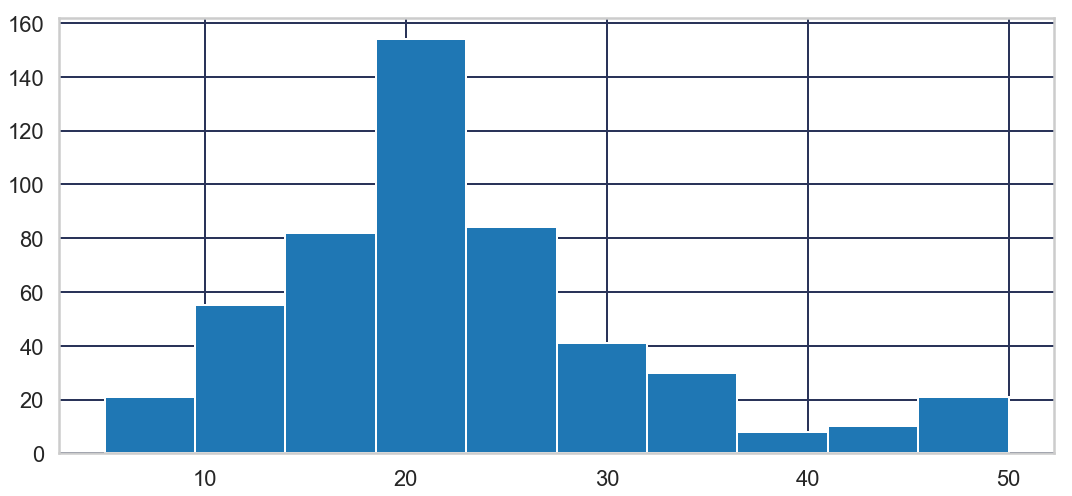

In [7]:
fig, ax = plt.subplots(figsize=(15, 7))
plt.style.use('seaborn-dark')

for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
    plt.rcParams[param] = '#212946'  # bluish dark grey, also nice: #4e5481'(Dusk)

for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color']:
    plt.rcParams[param] = '.9'      #9dbcd4 (light-grey-blue)
ax.grid(color='#2A3459')    
plt.hist(bos.PRICE); plt.tight_layout()

**Correlations**
_Taking a quick peek at correlations from the get-go_:
1. variables and target (_the good_) 
2. variable to variable. Variables that are highly correlated with each other. This is basically redundant data where we would want to remove the lesser important of the two. An extreme example would be where variable x4 and and x5  and not only unnecessary to keep around __

(1) Lets visualize our linear correlations with "PRICE"

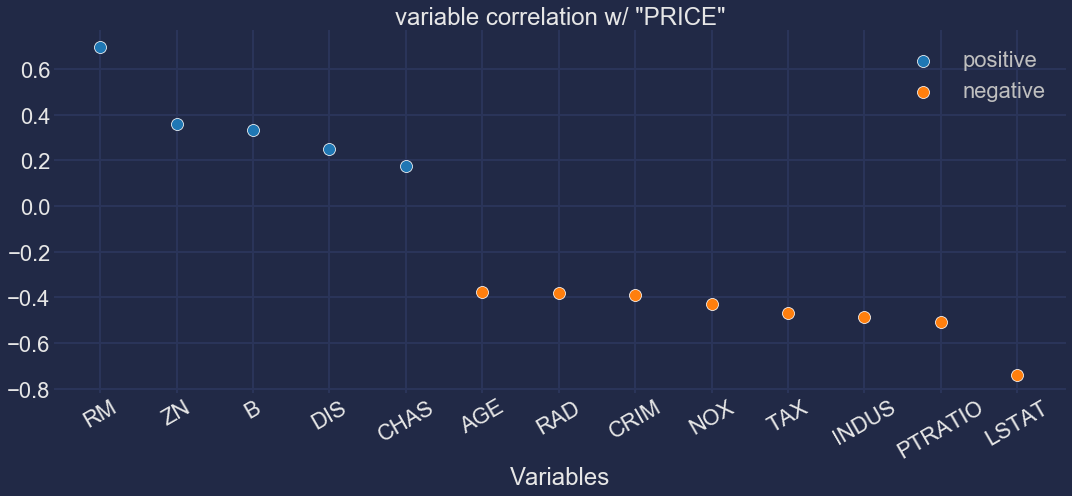

In [8]:
targ_corr = bos.corr()['PRICE'] # target/variable correlations
price_corrs = (targ_corr).drop('PRICE').sort_values(ascending=False)

# series to df for easy handling
price_corr = pd.DataFrame(price_corrs, index=price_corrs.index)
price_corr = price_corr.rename(columns={'PRICE':'price_corr'}) 
priceCorr_lbls = list(price_corr.index)
# subset negative from positive
neg_corrs = price_corr.loc[price_corr.price_corr < 0, 'price_corr']
pos_corrs = price_corr.loc[price_corr.price_corr > 0, 'price_corr']

# plot scatterplot-dot style
fig, ax = plt.subplots(figsize=(15, 7))
plt.style.use('seaborn-dark')

for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
    plt.rcParams[param] = '#212946'  #bluish dark grey; or #4e5481'(Dusk)

for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color']:
    plt.rcParams[param] = '.75'      #9dbcd4 (light-grey-blue)
ax.grid(color='#2A3459')

sns.scatterplot(data=pos_corrs, label='positive')
sns.scatterplot(data=neg_corrs, label='negative')
ax.set_xticklabels(priceCorr_lbls, rotation=30)
plt.title('variable correlation w/ "PRICE"')
plt.xlabel('Variables')
ax.grid(color='#2A3459')        # darkbluish
plt.tight_layout()

(2)
Probably the most common way to visualize correlations, both individually for all variables with target as well as across all variables amongst themselves, is with the help of a heatmap, lets do so below, to look at our variable to variable correlation.

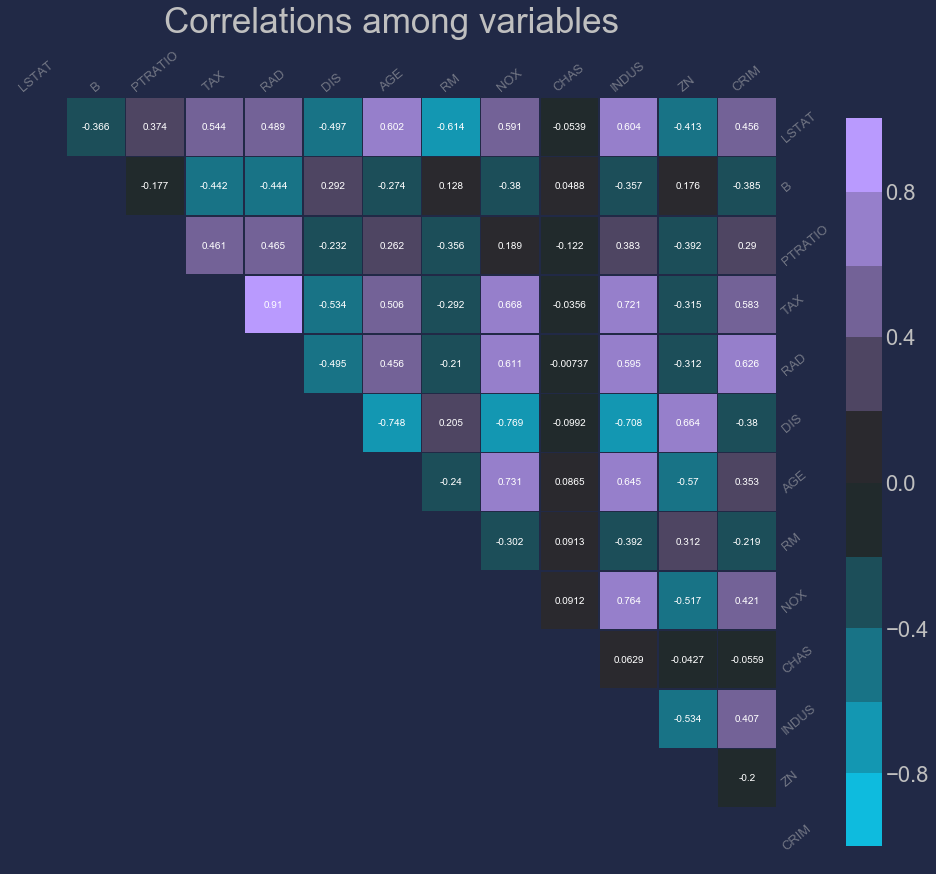

In [9]:
collinear_search = bos.corr().drop("PRICE").drop('PRICE', axis=1)
# Establish figure and customize
fig, ax = plt.subplots(figsize=(14, 14))
for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
    plt.rcParams[param] = '#212946'
# heatmap
mask_lower = np.triu(collinear_search) # mask matrix
color = sns.diverging_palette(220, 276, s=99, l=70,
                              sep=14, n=10, center="dark")
ax = sns.heatmap(collinear_search, mask=mask_lower, cmap=color,
                 square=True, annot=True, fmt ='.3g',
                 linewidths=.5, linecolor= '#212946',
                 vmin=-1, center=0, vmax=1, cbar_kws={'shrink': .75, 'pad':.07})
# Customize tick and labels 
ax.set_xticklabels(ax.get_yticklabels(), alpha=.5, size=13, 
                   rotation=40, horizontalalignment='center')
ax.set_yticklabels(ax.get_xticklabels(), alpha=.5, size=13, 
                   rotation=40, verticalalignment='center')
ax.invert_xaxis(), ax.invert_yaxis() # invert for clean look
ax.xaxis.tick_top()         # move x-axis labels above chart
ax.yaxis.tick_right()     # move y-axis labels to right side
ax.set_title('Correlations among variables', pad=65, loc='center', size=35)
plt.tight_layout()

Let's look at 'PTRATIO' (pupil-to-teacher ratio in schools), 'CRIM' (per capita crime rate), and 'RM' (number of rooms).  

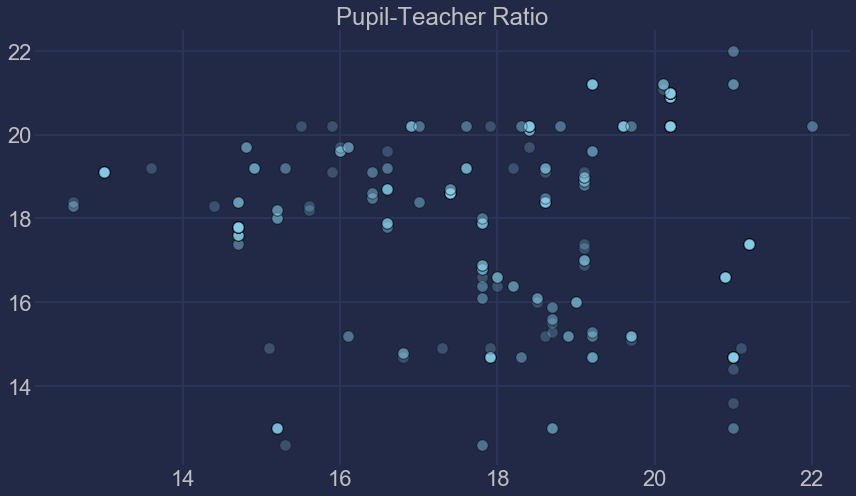

In [10]:
plt.figure(figsize=(12,7))
plt.scatter(bos.PTRATIO, np.sort(bos.PTRATIO.values), label='pupil-teacher\nratio',
                 alpha=.25, s=125, color='skyblue', edgecolors='black', lw=1)
plt.grid(color='#2A3459')
plt.title('Pupil-Teacher Ratio')
plt.tight_layout()

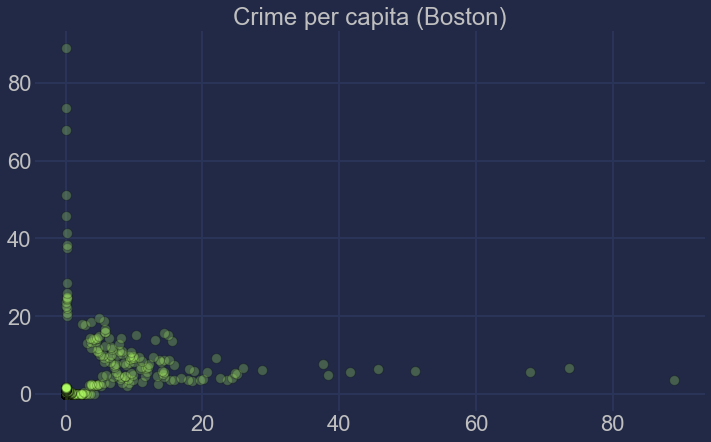

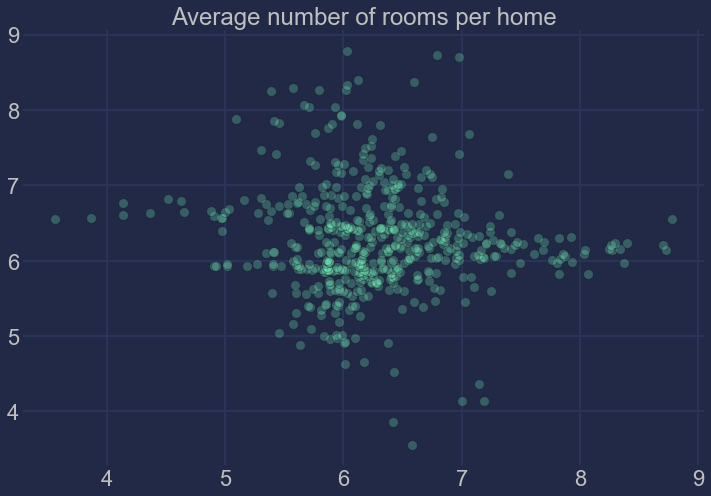

In [11]:
plt.figure(figsize=(12,7))
plt.scatter(bos.CRIM, np.sort(bos.CRIM.values), label='Crime', 
            alpha=.25, s=95, color='#b1ff65', edgecolors='black', lw=1)
plt.grid(color='#2A3459')
plt.title('Crime per capita (Boston)')
#plt.legend(frameon=True)
plt.show()

plt.figure(figsize=(10,7))
plt.scatter(bos.RM, np.sort(bos.RM.values), label='# of rooms',
            alpha=.25, s=95, color='#7bfdc7', edgecolors='black', lw=1)
plt.grid(color='#2A3459')
plt.title('Average number of rooms per home')
#plt.legend(frameon=True)
plt.tight_layout()

<div class="span5 alert alert-info">

<p><b>Exercise:</b> What kind of relationship do you see? e.g. positive, negative?  linear? non-linear? Is there anything else strange or interesting about the data? What about outliers?</p>


<p><b>Exercise:</b> Create scatter plots between *RM* and *PRICE*, and *PTRATIO* and *PRICE*. Label your axes appropriately using human readable labels. Tell a story about what you see.</p>

<p><b>Exercise:</b> What are some other numeric variables of interest? Why do you think they are interesting? Plot scatterplots with these variables and *PRICE* (house price) and tell a story about what you see.</p>

</div>

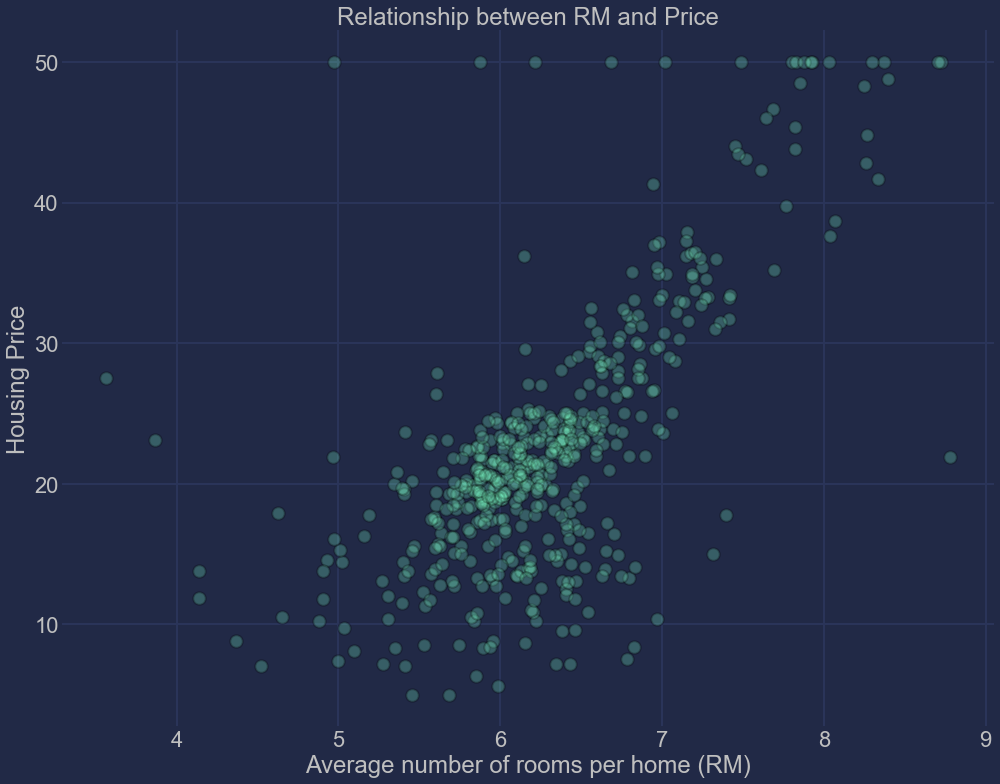

In [12]:
fig, ax = plt.subplots(figsize=(14,11))
plt.scatter(bos.RM, bos.PRICE, alpha=.25, s=155, c='#7bfdc7', edgecolors='black')
plt.title("Relationship between RM and Price")
plt.xlabel("Average number of rooms per home (RM)")
plt.ylabel("Housing Price")
plt.grid(color='#2A3459')
plt.tight_layout()

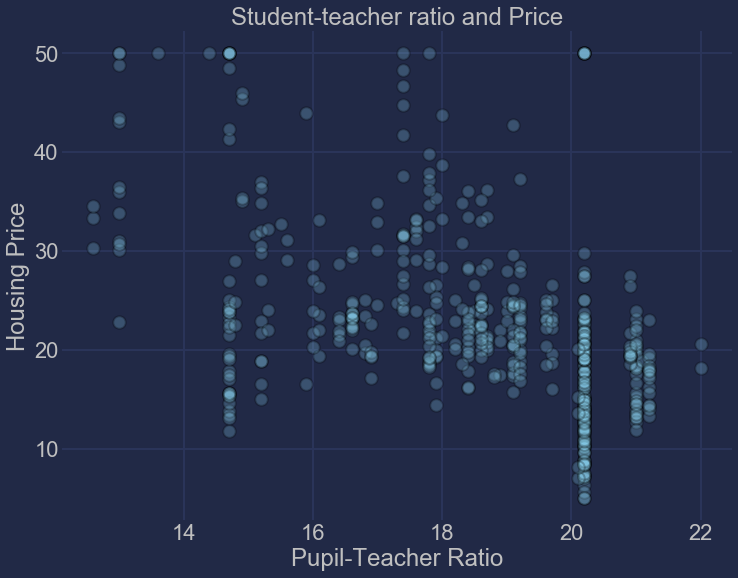

In [13]:
fig, ax = plt.subplots(figsize=(12,9))
plt.scatter(bos.PTRATIO, bos.PRICE, alpha=.25, s=155, c='skyblue', edgecolors='black')
plt.title("Student-teacher ratio and Price")
plt.xlabel("Pupil-Teacher Ratio")
plt.ylabel("Housing Price")
plt.grid(color='#2A3459')
plt.show()

We see  positive trend in price with number of rooms and a negative correlation between price and pupil-teacher ratio. This might make sense because in areas where there are high-pupil teacher ratios for the school districts, it could suggest a couple different things. Maybe the schools themselves have smaller budgets to provide adequate teacher work-force, these areas could also simply be high density living locations where the number of students, regardless of school budgets simply outweigh teacher-workforce or it could also suggest that maybe these school districts are not preferable schools to work for or the area the schools are located in are not preferable as opposed to there just being alot more kids than teachers available. These all are related in a way. typically higher density living locations such as urban inner-cities are both on average not as well funded, there tends to be more crime which suggests less preferable living as well as less demand in wanting to own a home in these areas, therefore less demand, lower house prices.

Is there a obvious relationship between the Crime rate of city and the price of buying a home there? We can also factor in pupil teacher ratio as a third variable.

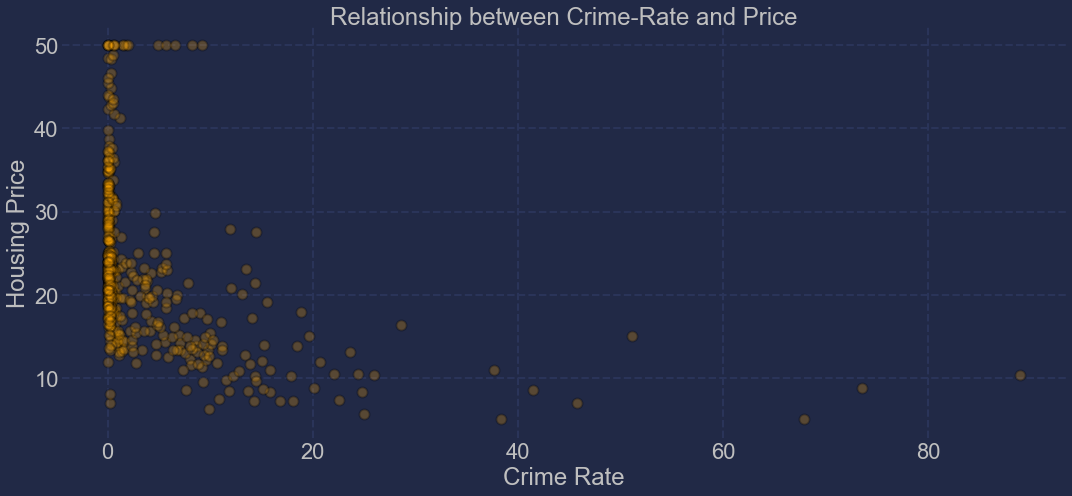

In [14]:
fig, ax = plt.subplots(figsize=(15, 7))
plt.scatter(bos.CRIM, bos.PRICE, s=100, c='orange', edgecolor='black', alpha=.25)
plt.xlabel("Crime Rate")
plt.ylabel("Housing Price")
plt.title("Relationship between Crime-Rate and Price", pad=2)
ax.grid(lw=2, ls='--', color='#2A3459')
plt.tight_layout()

We see some interesting observations here, it appears some of the most expensive places to live have a significantly higher crim rate relative to the rest of the areas where there is essentially no crime. Other than these homes we see a negative correlation as crime rate goes up, the cost of living relative to crime decreases. We can also wee there are many cities in the lower-bottom range for cost of living in terms of housing price that these places also have high crime rates spanning across the bottom of the plot with quite a few locations with extreme rates of crime compares to the rest.

We can also use [seaborn regplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/regression.html#functions-to-draw-linear-regression-models) for the scatterplot above. This provides automatic linear regression fits (useful for data exploration later on).

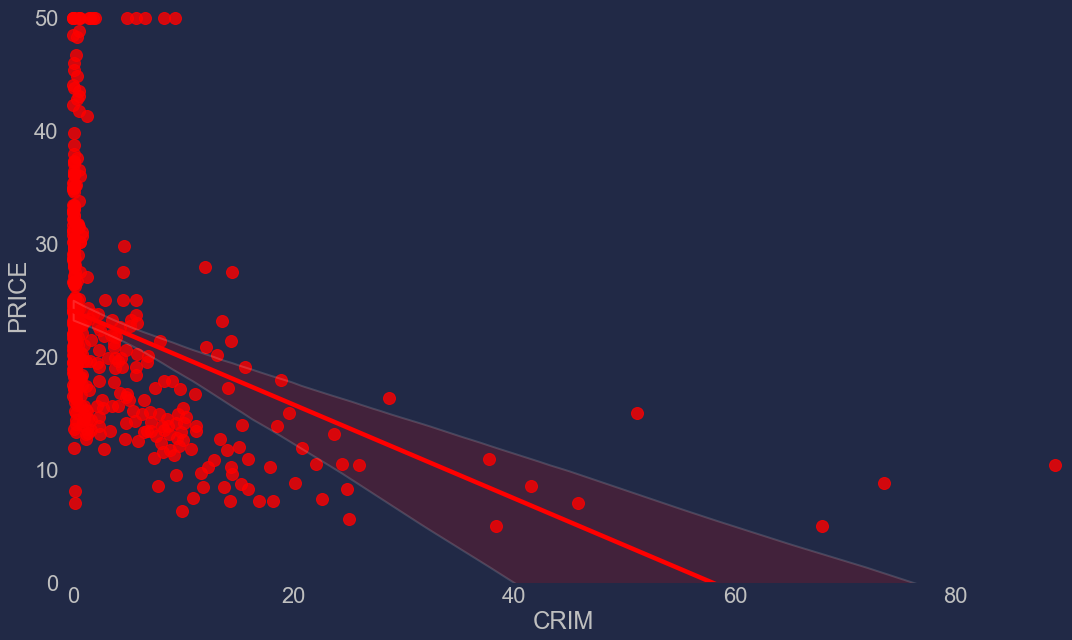

In [15]:
plt.figure(figsize=(15, 9))
plt.style.use('seaborn-dark-palette')
plt.rcParamsDefault
plt.autoscale(enable=True, tight=True, axis='both')
crim_price_df = bos[['CRIM', 'PRICE']]
sns.regplot('CRIM', 'PRICE', data=crim_price_df, color='r', fit_reg=True)
plt.ylim([0, np.max(crim_price_df.PRICE)+1])
plt.xlim([-1, np.max(crim_price_df.CRIM)+1])
plt.tight_layout()

Again, this plot makes even more clear perhaps of the significantly high-prices cities, though, little crime. With the regression line we see our trend that we eye-balled before. Notice the plot is of almost two subsets, our extreme priced-areas and then the rest of the cities with relatively similiar home-price range between 10-30, though wildly unequal crime-rates.

There may be some hidden relationships here within these two variables themselves that could be explored further, for additional insight. By segregating each into their own individual subsets to analize the data on a more granular level, to begin to make even more clear of the intrinsic nature of the variable. 

One way to subset or segregate a variable into its parts to deduct more knowledge is with the use of quartiles (can also be seen using the describe() method used earlier). **Quartiles are the values that seperate the Distribution into its Quantiles or percentiles**. We can also compute the quartiles manually with the numpy.percentile function or display easily with a boxplot.

Among many purposes of boxplots, they are a common choice to visualize outliers where they become more evident. Lets stick with crime rate and home-price.

In [16]:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

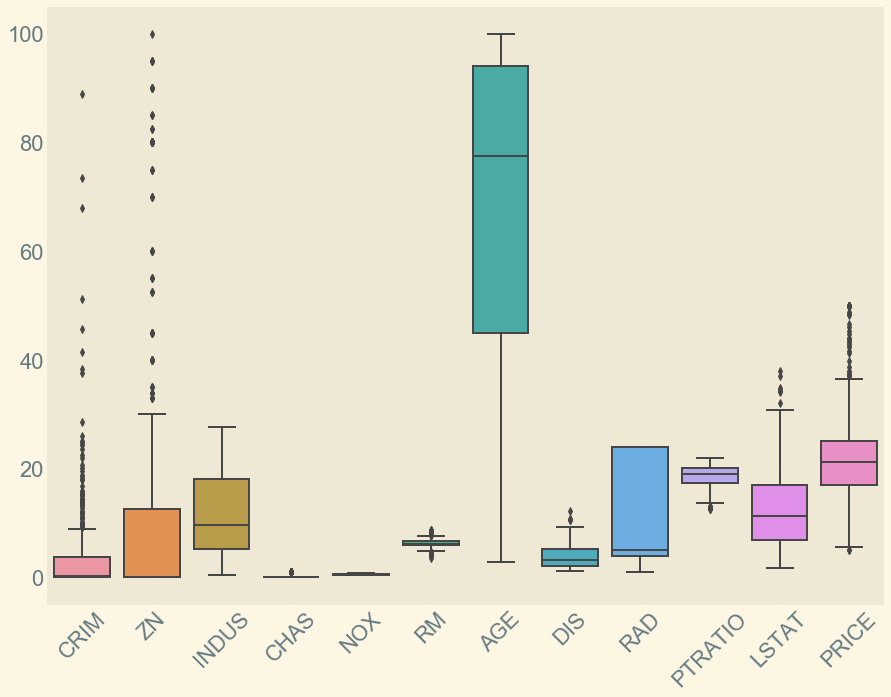

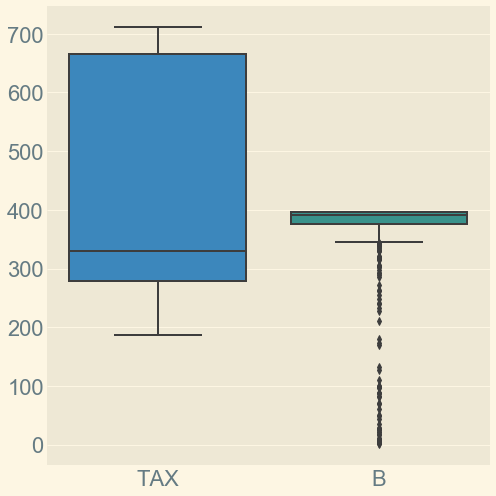

In [17]:
dfset = bos.drop(['TAX', 'B'], axis=1)
plt.style.use('Solarize_Light2')

plt.figure(figsize=(15,11))
sns.boxplot(data=dfset)
plt.xticks(rotation=45)
#plt.grid(alpha=.25)
plt.grid(alpha=.2, lw=1)
plt.show()

dfset1 = bos[['TAX', 'B']]
plt.figure(figsize=(7,7))
sns.boxplot(data=dfset1)
plt.tight_layout()

Lets take a closer look at our crime-rate per capita ("CRIM") and target ("PRICE")

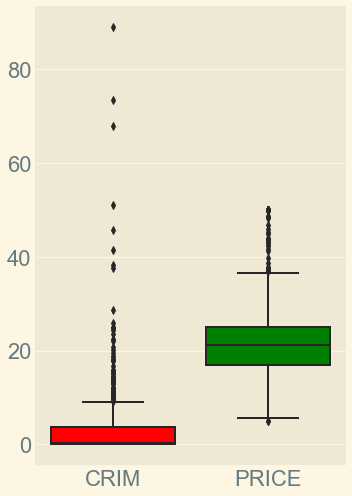

In [18]:
plt.figure(figsize=(5,7))
plt.style.use('Solarize_Light2')

crim_price_df = bos[['CRIM', 'PRICE']]
sns.boxplot(data=crim_price_df, palette=['red', 'green'], linewidth=2,
            saturation=5, )
plt.tight_layout()

we see significant outliers in both. lets take a look at there densities.

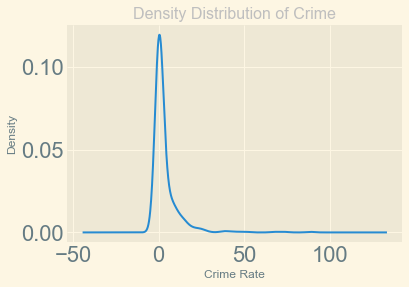

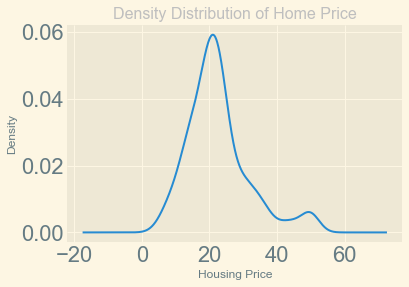

In [19]:
(bos['CRIM'].plot.kde()), plt.title('Density Distribution of Crime')
plt.xlabel('Crime Rate')
plt.show()
(bos['PRICE'].plot.kde()), plt.title('Density Distribution of Home Price')
plt.xlabel('Housing Price')
plt.show()

for Crime, we see a significant right-tail, where for the most part the majority of cities have a crime rate between 0-20 but because of these extreme values outside of whats normally observed, this stretches out our right tail of the density curve created whats called a "right-skew". skewed data can cause wild variance in model predictions and outliers need to be dealth with accordingly. Our housing price is more normally distributed but we can see it is as well containing some significantly larger values than average with a significant peak around 50.

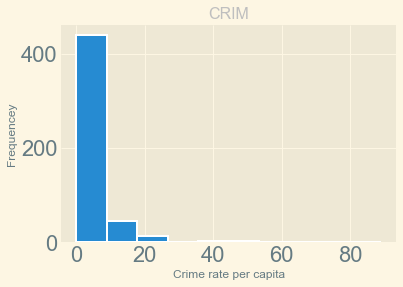

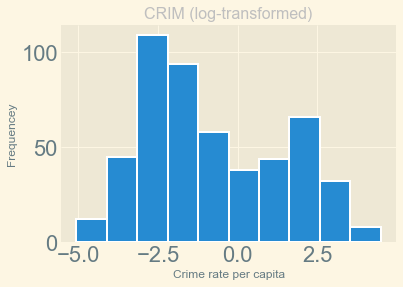

In [20]:
#boston crime rate un-transformed
plt.hist(bos.CRIM)
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()
# crime transformed
plt.hist(np.log(bos.CRIM))
plt.title("CRIM (log-transformed)")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

<div class="span5 alert alert-info">

<p><b>Exercise:</b> In the above histogram, we took the logarithm of the crime rate per capita. Repeat this histogram without taking the log. What was the purpose of taking the log? What do we gain by making this transformation? What do you now notice about this variable that is not obvious without making the transformation?

<p><b>Exercise:</b> Plot the histogram for *RM* and *PTRATIO* against each other, along with the two variables you picked in the previous section. We are looking for correlations in predictors here.</p>
</div>

The purpose of taking the log is to account for nonlinear relationships; deal with outliers. We are able to minimize the effect of the outliers in the variable. Without the transofrmation we are able to better understand the distribution without skew created by the outliers.

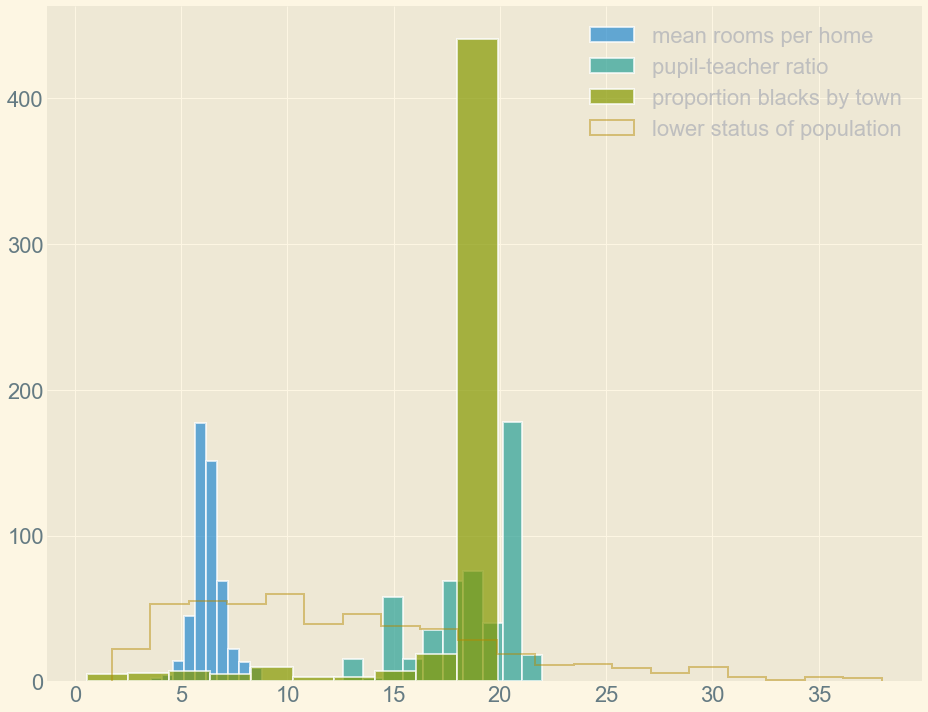

In [21]:
plt.figure(figsize=(13,10))
plt.hist(bos.RM, label='mean rooms per home', alpha=.7)
plt.hist(bos.PTRATIO, label='pupil-teacher ratio', alpha=0.7)
plt.hist(np.sqrt(bos.B), label='proportion blacks by town', alpha=0.7)
plt.hist(bos.LSTAT, label='lower status of population', histtype='step', alpha=0.45, bins=20)
plt.legend()
plt.tight_layout()

## Part 3: Linear Regression with Boston Housing Data Example
***

Here, 

$Y$ = boston housing prices (called "target" data in python, and referred to as the dependent variable or response variable)

and

$X$ = all the other features (or independent variables, predictors or explanatory variables)

which we will use to fit a linear regression model and predict Boston housing prices. **We will use the least-squares method to estimate the coefficients.**  

### Fitting Linear Regression using `statsmodels`
***
[Statsmodels](http://statsmodels.sourceforge.net/) is a great Python library for a lot of basic and inferential statistics. It also provides basic regression functions using an R-like syntax, so it's commonly used by statisticians. While we don't cover statsmodels officially in the Data Science Intensive workshop, it's a good library to have in your toolbox. Here's a quick example of what you could do with it. The version of least-squares we will use in statsmodels is called *ordinary least-squares (OLS)*. There are many other versions of least-squares such as [partial least squares (PLS)](https://en.wikipedia.org/wiki/Partial_least_squares_regression) and [weighted least squares (WLS)](https://en.wikipedia.org/wiki/Iteratively_reweighted_least_squares).

In [22]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

# statsmodels works nicely with pandas dataframes
m = ols('PRICE ~ RM', bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Thu, 14 May 2020   Prob (F-statistic):           2.49e-74
Time:                        21:49:45   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

#### Interpreting coefficients

There is a ton of information in this output. But we'll concentrate on the coefficient table (middle table). We can interpret the `RM` coefficient (9.1021) **by first noticing that the p-value** (under `P>|t|`) is so small, basically zero. **This means that the number of rooms, `RM`, is a statisticall significant predictor of `PRICE`.**

also, another note from [statisticsbyjim.com](https://statisticsbyjim.com/regression/interpret-coefficients-p-values-regression/)
>"If the p-value for a variable is less than your significance level, your sample data provide enough evidence to reject the null hypothesis for the entire population. Your data favor the hypothesis that there is a non-zero correlation. Changes in the independent variable are associated with changes in the response at the population level. This variable is statistically significant and probably a worthwhile addition to your regression model. It is standard practice to use the coefficient p-values to decide whether to include variables in the final model."

back to our problem at hand, 

The **regression coefficient** for `RM` of 9.1021 means that *on average, each additional room is associated with an increase of $\$9,100$ in house price net of the other variables*. The confidence interval gives us a range of plausible values for this average change, about ($\$8,279, \$9,925$), definitely not chump change. 

In general, the $\hat{\beta_i}, i > 0$ (slope) can be interpreted as the following: "A one unit increase in $x_i$ is associated with, on average, a $\hat{\beta_i}$ increase/decrease in $y$ net of all other variables."

On the other hand, the interpretation for the **intercept**, $\hat{\beta}_0$ is the average of $y$ given that all of the independent variables $x_i$ are 0.

from [theanalysisfactor.com](https://www.theanalysisfactor.com/interpreting-the-intercept-in-a-regression-model/)

>"if X sometimes equals 0, the intercept is simply the expected mean value of Y at that value. If X never equals 0, then the intercept has no intrinsic meaning."

####  `statsmodels` formulas
***
This formula notation will seem familiar to `R` users, but will take some getting used to for people coming from other languages or are new to statistics.

The formula gives instruction for a general structure for a regression call. For `statsmodels` (`ols` or `logit`) calls you need to have a Pandas dataframe with column names that you will add to your formula. In the below example you need a pandas data frame that includes the columns named (`Outcome`, `X1`,`X2`, ...), but you don't need to build a new dataframe for every regression. Use the same dataframe with all these things in it. The structure is very simple:

`Outcome ~ X1`

But of course we want to to be able to handle more complex models, for example multiple regression is doone like this:

`Outcome ~ X1 + X2 + X3`

In general, a formula for an OLS multiple linear regression is

`Y ~ X1 + X2 + ... + Xp`

This is the very basic structure but it should be enough to get you through the homework. Things can get much more complex. You can force statsmodels to treat variables as categorical with the `C()` function, call numpy functions to transform data such as `np.log` for extremely-skewed data, or fit a model without an intercept by including `- 1` in the formula. For a quick run-down of further uses see the `statsmodels` [help page](http://statsmodels.sourceforge.net/devel/example_formulas.html).


Let's see how our model actually fit our data. We can see below that there is a ceiling effect, we should probably look into that. Also, for large values of $Y$ we get underpredictions, most predictions are below the 45-degree gridlines. 

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> Create a scatterplot between the predicted prices, available in `m.fittedvalues` (where `m` is the fitted model) and the original prices. How does the plot look? Do you notice anything interesting or weird in the plot? Comment on what you see.</p>
</div>

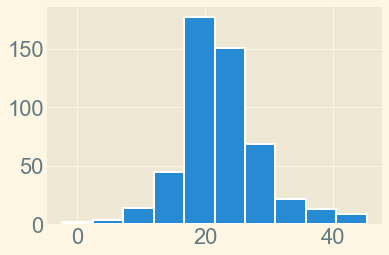

count    506.000000
mean      22.532806
std        6.395298
min       -2.258011
25%       18.899842
50%       21.839823
75%       25.617198
max       45.245896
dtype: float64

'variaince   40.81900438499604'

In [23]:
plt.hist(m.fittedvalues)
plt.show()
display(m.fittedvalues.describe())
display('variaince   {}'.format(np.var(m.fittedvalues)))

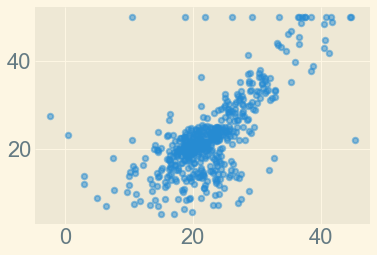

In [24]:
data = pd.concat([m.fittedvalues, bos.PRICE], axis=1).rename(columns={0:'predictions'})
# plt.scatter(data=, alpha=.5, s=30)
plt.scatter(x='predictions', y='PRICE', data=data, alpha=.5, s=30)

### Fitting Linear Regression using `sklearn`


In [25]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### What can you do with a LinearRegression object? 
***
Check out the scikit-learn [docs here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). We have listed the main functions here. **Most machine learning models in scikit-learn follow this same API of fitting a model with `fit`, making predictions with `predict` and the appropriate scoring function `score` for each model.**

Main functions | Description
--- | --- 
`lm.fit()` | Fit a linear model
`lm.predit()` | Predict Y using the linear model with estimated coefficients
`lm.score()` | Returns the coefficient of determination (R^2). *A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model*

Output | Description
--- | --- 
`lm.coef_` | Estimated coefficients
`lm.intercept_` | Estimated intercept 

### Fit a linear model
***

The `lm.fit()` function estimates the coefficients the linear regression using least squares. 

In [26]:
lm.fit(X, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

<div class="span5 alert alert-info">

<p><b>Exercise:</b> How would you change the model to not fit an intercept term? Would you recommend not having an intercept? Why or why not? For more information on why to include or exclude an intercept, look [here](https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-is-regression-through-the-origin/).</p>

<p><b>Exercise:</b> One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). To satisfy this, is it enough that the residuals are normally distributed? Explain your answer.</p>

<p><b>Exercise:</b> True or false. To use linear regression, $Y$ must be normally distributed. Explain your answer.</p>
</div>


- By setting "fit_intercept=**_False_**"

- no, they need to be also independant of one another where if plotted on a scatterplot, shouls see no relation or trend in any direction.

- False. Results using Linear regression are still valid whether "Y" is normal or non-normal.

>"Your characterization of how multiple regression works is inaccurate. Your version implies fitting a simple linear regression for each variable in turn (and presumably using each of those slopes as the coefficient for that variable in the multiple regression model). This notion leaves you with the problem of how to deal with the fact that the intercepts from each simple regression are quite likely to differ.
    However, that approach is not how multiple regression works / estimates the parameters. Instead, all coefficients (including the intercept) are fitted simultaneously. Using Ordinary Least Squares (OLS), we find coefficient estimates that minimize the sum of the squared errors in the dependent variable. That is, we minimize the vertical distance between the model's predicted Y value at a given location in X and the observed Y value there. To find a vector of beta estimates, we use the following matrix equation:
$$\hat{\beta}=(X^{⊤}X)^{−1}X^{⊤}Y$$
    It is worth noting explicitly that the coefficients we find this way will not necessarily be the same as those betas found individually. To understand this further, it may help you to read my answer[here](https://stats.stackexchange.com/questions/78828/is-there-a-difference-between-controlling-for-and-ignoring-other-variables-i/78830#78830)
At any rate, the standard errors for a multiple regression model are calculated as _____ where s2 is the variance of the residuals and diag refers to extracting the elements on the main diagonal of the matrix. Since the intercept (β^0) is first of our regression parameters, it is the square root of the element in the first row first column.
    Once we have our fitted model, the standard error for the intercept means the same thing as any other standard error: It is our estimate of the standard deviation of the sampling distribution of the intercept. For a fuller description of standard errors in a regression context, it may help to read my answer [here](https://stats.stackexchange.com/questions/18208/how-to-interpret-coefficient-standard-errors-in-linear-regression/18213#18213)
    A common use of the intercept's standard error would be to test if the observed intercept is reasonably likely to have occurred under the assumption that its true value is some pre-specified number (such as 0), as @IrishStat notes."
    
   [from this stats exchange Q&A](https://stats.stackexchange.com/questions/173271/what-exactly-is-the-standard-error-of-the-intercept-in-multiple-regression-analy)

### Estimated intercept and coefficients

Let's look at the estimated coefficients from the linear model using `1m.intercept_` and `lm.coef_`.  

After we have fit our linear regression model using the least squares method, we want to see what are the estimates of our coefficients $\beta_0$, $\beta_1$, ..., $\beta_{13}$: 

$$ \hat{\beta}_0, \hat{\beta}_1, \ldots, \hat{\beta}_{13} $$



In [27]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))
print('Number of coefficients: {}'.format(len(lm.coef_)))
# The coefficients
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

Estimated intercept coefficient: 36.45948838508963
Number of coefficients: 13


,features,estimatedCoefficients
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


### Predict Prices 

We can calculate the predicted prices ($\hat{Y}_i$) using `lm.predict`. 

$$ \hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_1 + \ldots \hat{\beta}_{13} X_{13} $$

In [28]:
# first five predicted prices
lm.predict(X)[0:5]

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423])

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set III</h3>

<p><b>Exercise:</b> Histogram: Plot a histogram of all the predicted prices. Write a story about what you see. Describe the shape, center and spread of the distribution. Are there any outliers? What might be the reason for them? Should we do anything special with them?</p>

<p><b>Exercise:</b> Scatterplot: Let's plot the true prices compared to the predicted prices to see they disagree (we did this with `statsmodels` before).</p>

<p><b>Exercise:</b> We have looked at fitting a linear model in both `statsmodels` and `scikit-learn`. What are the advantages and disadvantages of each based on your exploration? Based on the information provided by both packages, what advantage does `statsmodels` provide?</p>
</div>

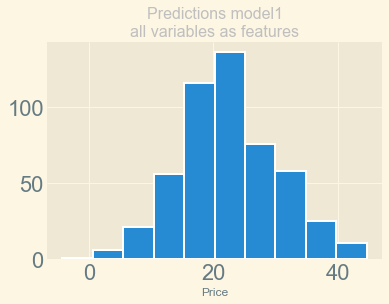

Predicted Price mean: 22.533
Predicted Price variance: 62.525
Predicted Price SD: 7.907


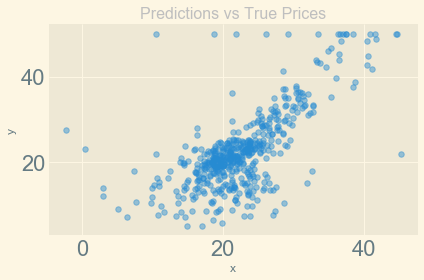

In [29]:
plt.hist(lm.predict(X))
plt.title('Predictions model1\nall variables as features'); plt.xlabel('Price')
plt.show()

print('Predicted Price mean: %.3f' %(np.mean(lm.predict(X))))
print('Predicted Price variance: %.3f' %(np.var(lm.predict(X))))
print('Predicted Price SD: %.3f' %(np.std(lm.predict(X))))

#plt.figure(figsize=(7,7))
data = pd.DataFrame({'x': m.fittedvalues, 'y':bos.PRICE})
#color = ['r' if d in 'x' else 'b' for d in data]
#lbls = ['predictions' if c == 'r' else 'True Prices' for c in color]
sns.regplot(x='x', y='y', data=data, scatter=True, fit_reg=False,
            scatter_kws={'alpha': .45, 's':30})
plt.title('Predictions vs True Prices')
#plt.legend()
plt.tight_layout()

Normally distributed (shape) for the most part with what looks to be some outliers at both tails.



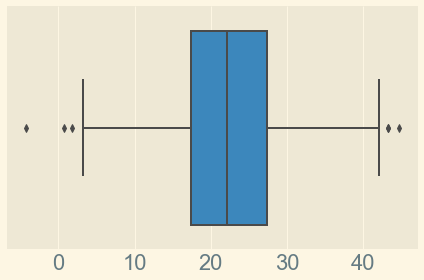

In [30]:
print('Normally distributed (shape) for the most part with what looks to be some outliers at both tails.\n')
sns.boxplot(lm.predict(X))
plt.tight_layout()

### Evaluating the Model: Sum-of-Squares

The partitioning of the sum-of-squares shows the variance in the predictions explained by the model and the variance that is attributed to error.

$$TSS = ESS + RSS$$

#### Residual Sum-of-Squares (aka $RSS$)

The residual sum-of-squares is one of the basic ways of quantifying how much error exists in the fitted model. We will revisit this in a bit.

$$ RSS = \sum_{i=1}^N r_i^2 = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

In [31]:
# RSS quantifies how much error exists in fitted model
print(np.sum((bos.PRICE - lm.predict(X)) ** 2))

11078.784577954979


#### Explained Sum-of-Squares (aka $ESS$)

The explained sum-of-squares measures the variance explained by the regression model.

$$ESS = \sum_{i=1}^N \left( \hat{y}_i - \bar{y} \right)^2 = \sum_{i=1}^N \left( \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) - \bar{y} \right)^2$$

In [32]:
# ESS measures the variance explained by the model
print(np.sum((lm.predict(X) - np.mean(bos.PRICE)) ** 2))

31637.510837064125


### Evaluating the Model: The Coefficient of Determination ($R^2$)

The coefficient of determination, $R^2$, tells us the percentage of the variance in the response variable $Y$ that can be explained by the linear regression model.

$$ R^2 = \frac{ESS}{TSS} $$

The $R^2$ value is one of the most common metrics that people use in describing the quality of a model, but it is important to note that *$R^2$ increases artificially as a side-effect of increasing the number of independent variables.* While $R^2$ is reported in almost all statistical packages, another metric called the *adjusted $R^2$* is also provided as it takes into account the number of variables in the model, and can sometimes even be used for non-linear regression models!

$$R_{adj}^2 = 1 - \left( 1 - R^2 \right) \frac{N - 1}{N - K - 1} = R^2 - \left( 1 - R^2 \right) \frac{K}{N - K - 1} = 1 - \frac{\frac{RSS}{DF_R}}{\frac{TSS}{DF_T}}$$

where $N$ is the number of observations, $K$ is the number of variables, $DF_R = N - K - 1$ is the degrees of freedom associated with the residual error and $DF_T = N - 1$ is the degrees of the freedom of the total error.

In [33]:
# the coefficient of Determination (R-squared) = ESS/TSS (where TSS = ESS + RSS)
# R-squared tells us the % of the variance in the repsponse var(Y) thats explained by the linear regression model

### Evaluating the Model: Mean Squared Error and the $F$-Statistic
***
The mean squared errors are just the *averages* of the sum-of-squares errors over their respective degrees of freedom.

$$MSE = \frac{RSS}{N-K-1}$$

$$MSR = \frac{ESS}{K}$$

**Remember:** Notation may vary across resources particularly the use of $R$ and $E$ in $RSS/ESS$ and $MSR/MSE$. In some resources, E = explained and R = residual. In other resources, E = error and R = regression (explained). **This is a very important distinction that requires looking at the formula to determine which naming scheme is being used.**

Given the MSR and MSE, we can now determine whether or not the entire model we just fit is even statistically significant. We use an $F$-test for this. The null hypothesis is that all of the $\beta$ coefficients are zero, that is, none of them have any effect on $Y$. The alternative is that *at least one* $\beta$ coefficient is nonzero, but it doesn't tell us which one in a multiple regression:

$$H_0: \beta_i = 0, \mbox{for all $i$} \\
H_A: \beta_i > 0, \mbox{for some $i$}$$ 

$$F = \frac{MSR}{MSE} = \left( \frac{R^2}{1 - R^2} \right) \left( \frac{N - K - 1}{K} \right)$$
 
Once we compute the $F$-statistic, we can use the $F$-distribution with $N-K$ and $K-1$ degrees of degrees of freedom to get a p-value.

**Warning!** The $F$-statistic mentioned in this section is NOT the same as the F1-measure or F1-value discused in Unit 7.

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set IV</h3>

<p>Let's look at the relationship between `PTRATIO` and housing price.</p>

<p><b>Exercise:</b> Try fitting a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town) and interpret the intercept and the coefficients.</p>

<p><b>Exercise:</b> Calculate (or extract) the $R^2$ value. What does it tell you?</p>

<p><b>Exercise:</b> Compute the $F$-statistic. What does it tell you?</p>

<p><b>Exercise:</b> Take a close look at the $F$-statistic and the $t$-statistic for the regression coefficient. What relationship do you notice? Note that this relationship only applies in *simple* linear regression models.</p>
</div>

**statsmodels, model Evaluation**

In [34]:
#import statsmodels.api as sm
#from statsmodels.formula.api import ols

# statsmodels works nicely with pandas dataframes
lm2_sm = ols('PRICE ~ PTRATIO', bos).fit()
print(lm2_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     175.1
Date:                Thu, 14 May 2020   Prob (F-statistic):           1.61e-34
Time:                        21:49:47   Log-Likelihood:                -1764.8
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.3446      3.029     20.581      0.0

**SciKit-Learn model, evaluation**

~SIMPLE LINEAR REGRESSION RESULTS~
  (solo feature, "PTRATIO")


Number of coefficients: 1
Estimated intercept coefficient: 62.34462747483265

The Coefficients (lm2)


,feature,estimatedCoefficient
0,PTRATIO,-2.157175


(predictions) Mean: 22.533
(predictions) Variance: 21.767
(predictions) SD: 4.666

Residual Sum of Squares: 31702.013207
Explained Sum of Squares: 11014

R^2 and F-statistic for linear model 2
F-statistic: -0
R^2: 0


Conclusion - We see, with only one feature(pupil-teacher ratio) the model explains 0% of the variance in our target("PRICE")


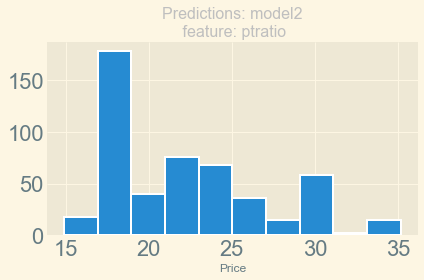

In [35]:
#from sklearn.linear_model import LinearRegression

lm2 = LinearRegression()
X_ = pd.DataFrame(bos.PTRATIO)

#X_ = np.array(X_).reshape(-1,1)
lm2.fit(X_, bos.PRICE)
print('~SIMPLE LINEAR REGRESSION RESULTS~\n  (solo feature, "PTRATIO")\n\n')
print('Number of coefficients: {}'.format(len(lm2.coef_)))
print('Estimated intercept coefficient: {}\n'.format(lm2.intercept_))

# the Coefficients
print('The Coefficients (lm2)')
#X_ = X_.reshape(-1,1)
display(pd.DataFrame({'feature': X_.columns, 'estimatedCoefficient': lm2.coef_})[['feature', 'estimatedCoefficient']])

#plot distribution of predictions
plt.hist(lm2.predict(X_))
plt.title('Predictions: model2\n feature: ptratio'); plt.xlabel("Price")
plt.tight_layout()

#summary stats
print('(predictions) Mean: %.3f' %(np.mean(lm2.predict(X_))))
print('(predictions) Variance: %.3f' %(np.var(lm2.predict(X_))))
print('(predictions) SD: %.3f\n' %(np.std(lm2.predict(X_))))

# Residual Sum of Squares (RSS)
RSS_lm2 = np.sum((bos.PRICE - lm2.predict(X_)) ** 2)
print('Residual Sum of Squares: %f' %(RSS_lm2))

# Explained Sum of Squares (ESS)
ESS_lm2 = np.sum((lm2.predict(X_) - np.mean(bos.PRICE)) ** 2)
print('Explained Sum of Squares: %.f\n' %(ESS_lm2))

# the coefficient of Determination (R-squared) = ESS/TSS (where TSS = ESS + RSS)
TSS_lm2 = ESS_lm2 + RSS_lm2                             # TSS for linear model 2
# R-squared tells us the % of the variance in the repsponse var(Y) thats explained by the linear regression model
Rsqrd_lm2 = ESS_lm2 / TSS_lm2                         # R^2 for linear model #2

# evaluating the model: MSE and F-statistic. MSE is the avg RSS
MSE_lm2 = RSS_lm2 / (len(bos.PRICE) - len(X_) - 1) # MSE = RSS/(N-K-1); N=number of observations, K=number of variables

# MSR = ESS / K
MSR_lm2 = ESS_lm2 / len(X_)

# Determining whether model is statistically significant
F_lm2 = MSR_lm2/MSE_lm2       # F-statistic: F = MSR/MSE
print('R^2 and F-statistic for linear model 2\nF-statistic: %.f\nR^2: %.f\n\n' %(F_lm2, Rsqrd_lm2))

print('Conclusion - We see, with only one feature(pupil-teacher ratio) the model explains 0% of the variance in our target("PRICE")')

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set V</h3>

<p>Fit a linear regression model using three independent variables</p>

<ol>
<li> 'CRIM' (per capita crime rate by town)
<li> 'RM' (average number of rooms per dwelling)
<li> 'PTRATIO' (pupil-teacher ratio by town)
</ol>

<p><b>Exercise:</b> Compute or extract the $F$-statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Compute or extract the $R^2$ statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Which variables in the model are significant in predicting house price? Write a story that interprets the coefficients.</p>
</div>

Number of coefficients: 3
Estimated intercept coefficient: -3.3707043351542687


The Coefficients (linear model 3)


,features,estimatedCoefficients
0,CRIM,-0.204961
1,RM,7.380411
2,PTRATIO,-1.069546


(lm3 predictions) Mean: 22.533
(lm3 predictions) Variance: 50.174
(lm3 predictions) SD: 7.083
(lm3) Residual Sum of Squares: 17328.237120
(lm3) Explained Sum of Squares: 25388



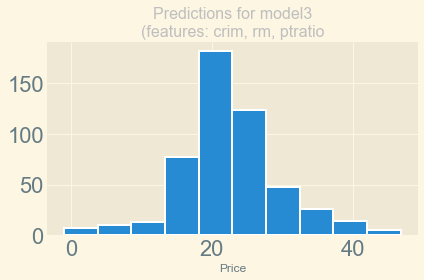

In [36]:
lm3 = LinearRegression()
X_1 = pd.DataFrame(bos[['CRIM', 'RM', 'PTRATIO']])
lm3.fit(X_1, bos.PRICE)
print('Number of coefficients: {}'.format(len(lm3.coef_)))
print('Estimated intercept coefficient: {}\n\n'.format(lm3.intercept_))

# the Coefficients
print('The Coefficients (linear model 3)')
display(pd.DataFrame({'features': X_1.columns, 'estimatedCoefficients': lm3.coef_})[['features', 'estimatedCoefficients']])

#plot distribution of predictions
plt.hist(lm3.predict(X_1))
plt.title('Predictions for model3\n(features: crim, rm, ptratio'); plt.xlabel("Price")
plt.tight_layout()

#summary stats
print('(lm3 predictions) Mean: %.3f' %(np.mean(lm3.predict(X_1))))
print('(lm3 predictions) Variance: %.3f' %(np.var(lm3.predict(X_1))))
print('(lm3 predictions) SD: %.3f' %(np.std(lm3.predict(X_1))))

# Residual Sum of Squares (RSS)
print('(lm3) Residual Sum of Squares: %f' %(np.sum((bos.PRICE - lm3.predict(X_1)) ** 2)))
# Explained Sum of Squares (ESS)
print('(lm3) Explained Sum of Squares: %.f\n' %(np.sum((lm3.predict(X_1) - np.mean(bos.PRICE)) ** 2)))

In [37]:
# Compute MSR and MSE where 𝑁 = number of observations and 𝐾 = number of variables

# MSR
ess = np.sum((lm3.predict(X_1) - np.mean(bos.PRICE)) ** 2)
k = X_1.columns.size
msr = ess / k
# MSE
rss = np.sum((bos.PRICE - lm3.predict(X_1)) ** 2)
n = len(X_1)
mse = rss / (n - (k - 1))

# Compute F-Statistic
f = msr/mse
print('ESS: %f\nRSS: %f\nMSE: %f\nMSR: %f\nF-Statistic: %.1f' %(ess, rss, mse, msr, f))

ESS: 25388.058295
RSS: 17328.237120
MSE: 34.381423
MSR: 8462.686098
F-Statistic: 246.1


**I will now do the equivilant with Statsmodels, w/ our three features**

In [38]:
m3 = ols('PRICE ~ RM+CRIM+PTRATIO',bos).fit()
print(m3.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     245.2
Date:                Thu, 14 May 2020   Prob (F-statistic):           6.15e-98
Time:                        21:49:49   Log-Likelihood:                -1612.0
No. Observations:                 506   AIC:                             3232.
Df Residuals:                     502   BIC:                             3249.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3707      4.034     -0.836      0.4

## Part 4: Comparing Models

During modeling, there will be times when we want to compare models to see which one is more predictive or fits the data better. There are many ways to compare models, but we will focus on two.

### The $F$-Statistic Revisited

The $F$-statistic can also be used to compare two *nested* models, that is, two models trained on the same dataset where one of the models contains a *subset* of the variables of the other model. The *full* model contains $K$ variables and the *reduced* model contains a subset of these $K$ variables. This allows us to add additional variables to a base model and then test if adding the variables helped the model fit.

$$F = \frac{\left( \frac{RSS_{reduced} - RSS_{full}}{DF_{reduced} - DF_{full}} \right)}{\left( \frac{RSS_{full}}{DF_{full}} \right)}$$

where $DF_x = N - K_x - 1$ where $K_x$ is the number of variables in model $x$.

### Akaike Information Criterion (AIC)

Another statistic for comparing two models is AIC, which is based on the likelihood function and takes into account the number of variables in the model.

$$AIC = 2 K - 2 \log_e{L}$$

where $L$ is the likelihood of the model. AIC is meaningless in the absolute sense, and is only meaningful when compared to AIC values from other models. Lower values of AIC indicate better fitting models.

`statsmodels` provides the AIC in its output.

<div class="span5 alert alert-info">
<h3>Part 4 Checkup Exercises</h3>

<p><b>Exercise:</b> Find another variable (or two) to add to the model we built in Part 3. Compute the $F$-test comparing the two models as well as the AIC. Which model is better?</p>
</div>

Number of coefficients: 5
Estimated intercept coefficient: 11.615005996560766


The Coefficients (linear model 3.1)


,features,estimatedCoefficients
0,CRIM,-0.038921
1,RM,4.788176
2,PTRATIO,-0.877249
3,B,0.009593
4,LSTAT,-0.495139


(lm3.1) predictions) Mean: 22.533
(lm3.1) predictions) Variance: 58.140
(lm3.1) predictions) SD: 7.625
(lm3.1) Residual Sum of Squares: 13297.619604
(lm3.1) Explained Sum of Squares: 29419

ESS: 29418.675811
RSS: 13297.619604
MSE: 26.489282
MSR: 5883.735162
F-Statistic: 222.1


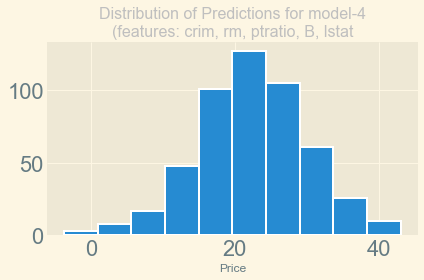

In [39]:
lm3_1 = LinearRegression()
X_1_1 = pd.DataFrame(bos[['CRIM', 'RM', 'PTRATIO','B','LSTAT']])
lm3_1.fit(X_1_1, bos.PRICE)
print('Number of coefficients: {}'.format(len(lm3_1.coef_)))
print('Estimated intercept coefficient: {}\n\n'.format(lm3_1.intercept_))

# the Coefficients
print('The Coefficients (linear model 3.1)')
display(pd.DataFrame({'features': X_1_1.columns, 'estimatedCoefficients': lm3_1.coef_})[['features', 'estimatedCoefficients']])

#plot distribution of predictions
plt.hist(lm3_1.predict(X_1_1))
plt.title('Distribution of Predictions for model-4\n(features: crim, rm, ptratio, B, lstat'); plt.xlabel("Price")
plt.tight_layout()

#summary stats
print('(lm3.1) predictions) Mean: %.3f' %(np.mean(lm3_1.predict(X_1_1))))
print('(lm3.1) predictions) Variance: %.3f' %(np.var(lm3_1.predict(X_1_1))))
print('(lm3.1) predictions) SD: %.3f' %(np.std(lm3_1.predict(X_1_1))))

# Residual Sum of Squares (RSS)
print('(lm3.1) Residual Sum of Squares: %f' %(np.sum((bos.PRICE - lm3_1.predict(X_1_1)) ** 2)))
# Explained Sum of Squares (ESS)
print('(lm3.1) Explained Sum of Squares: %.f\n' %(np.sum((lm3_1.predict(X_1_1) - np.mean(bos.PRICE)) ** 2)))


# Compute MSR and MSE where 𝑁 = number of observations and 𝐾 = number of variables

# MSR
ESS = np.sum((lm3_1.predict(X_1_1) - np.mean(bos.PRICE)) ** 2)
K = X_1_1.columns.size
MSR = ESS / K
# MSE
RSS = np.sum((bos.PRICE - lm3_1.predict(X_1_1)) ** 2)
N = len(X_1_1)
MSE = RSS / (N - (K - 1))

# Compute F-Statistic
F = MSR/MSE
print('ESS: %f\nRSS: %f\nMSE: %f\nMSR: %f\nF-Statistic: %.1f' %(ESS, RSS, MSE, MSR, F))

In [40]:
# For comparison of two nested models, see explain and formula above
F_nested = (rss - RSS/(3-5))/(RSS/5)
print('F-Statistic for nested model comparison: %f' %(F_nested))

F-Statistic for nested model comparison: 9.015541



## Part 5: Evaluating the Model via Model Assumptions and Other Issues
***
Linear regression makes several assumptions. It is always best to check that these assumptions are valid after fitting a linear regression model.

<div class="span5 alert alert-danger">
<ul>
  <li>**Linearity**. The dependent variable $Y$ is a linear combination of the regression coefficients and the independent variables $X$. This can be verified with a scatterplot of each $X$ vs. $Y$ and plotting correlations among $X$. Nonlinearity can sometimes be resolved by [transforming](https://onlinecourses.science.psu.edu/stat501/node/318) one or more independent variables, the dependent variable, or both. In other cases, a [generalized linear model](https://en.wikipedia.org/wiki/Generalized_linear_model) or a [nonlinear model](https://en.wikipedia.org/wiki/Nonlinear_regression) may be warranted.</li>
  <li>**Constant standard deviation**. The SD of the dependent variable $Y$ should be constant for different values of X. We can check this by plotting each $X$ against $Y$ and verifying that there is no "funnel" shape showing data points fanning out as $X$ increases or decreases. Some techniques for dealing with non-constant variance include weighted least squares (WLS), [robust standard errors](https://en.wikipedia.org/wiki/Heteroscedasticity-consistent_standard_errors), or variance stabilizing transformations.
    </li>
  <li> **Normal distribution for errors**.  The $\epsilon$ term we discussed at the beginning are assumed to be normally distributed. This can be verified with a fitted values vs. residuals plot and verifying that there is no pattern, and with a quantile plot.
  $$ \epsilon_i \sim N(0, \sigma^2)$$
Sometimes the distributions of responses $Y$ may not be normally distributed at any given value of $X$.  e.g. skewed positively or negatively. </li>
<li> **Independent errors**.  The observations are assumed to be obtained independently.
    <ul>
        <li>e.g. Observations across time may be correlated
    </ul>
</li>
</ul>  

</div>

There are some other issues that are important investigate with linear regression models.

<div class="span5 alert alert-danger">
<ul>
  <li>**Correlated Predictors:** Care should be taken to make sure that the independent variables in a regression model are not too highly correlated. Correlated predictors typically do not majorly affect prediction, but do inflate standard errors of coefficients making interpretation unreliable. Common solutions are dropping the least important variables involved in the correlations, using regularlization, or, when many predictors are highly correlated, considering a dimension reduction technique such as principal component analysis (PCA).
  <li>**Influential Points:** Data points that have undue influence on the regression model. These points can be high leverage points or outliers. Such points are typically removed and the regression model rerun.
</ul>
</div>


<div class="span5 alert alert-info">
<h3>Part 5 Checkup Exercises</h3>

<p>Take the reduced model from Part 3 to answer the following exercises. Take a look at [this blog post](http://mpastell.com/2013/04/19/python_regression/) for more information on using statsmodels to construct these plots.</p>
    
<p><b>Exercise:</b> Construct a fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions?</p>

<p><b>Exercise:</b> Construct a quantile plot of the residuals. What does the plot tell you?</p>

<p><b>Exercise:</b> What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?</p>

<p><b>Exercise:</b> Identify any outliers (if any) in your model and write a story describing what these outliers might represent.</p>

<p><b>Exercise:</b> Construct a leverage plot and identify high leverage points in the model. Write a story explaining possible reasons for the high leverage points.</p>

<p><b>Exercise:</b> Remove the outliers and high leverage points from your model and run the regression again. How do the results change?</p>
</div>

# Residual Analysis

_Assessing the appropriateness (of model) through **Residual Analysis**_

Below I will plot a Residual verses Fits Plot, or sometimes referred to as a "diagnostic plot". The purpose of this plot is to uncover potential non-linear relationships among residual values, unequal error variance (also called residual error, residual variance, or unexplained variance), as well as detect outliers. 

* _Note - if variation around the estimated regression line of a linear regression plot is constant (shown earlier), then the **assumption is of equal error variance**_

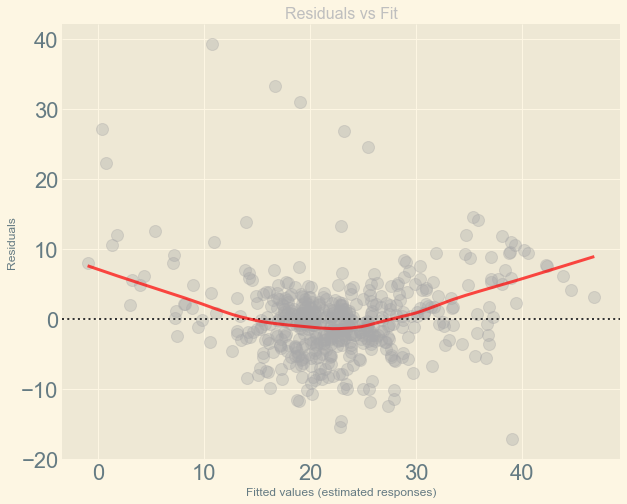

In [41]:
#statsmodel using OLS is alternative model of scikitlearn version (above commented out) from part 3
ols_model = ols('PRICE ~ CRIM + RM + PTRATIO', bos).fit() #Alternative: ols = sm.OLS(bos.PRICE, sm.add_constant(X_1))

# dataframe containing features (X_1), and target(y) as columns for plotting simplicity 
targ_feat_df = pd.DataFrame(bos[['CRIM', 'RM', 'PTRATIO', 'PRICE']])
# trained ols target values 
ols_fit_y = ols_model.fittedvalues
# residuals
ols_resid = ols_model.resid
# normalized residuals
ols_norm_resid = ols_model.get_influence().resid_studentized_internal
# square-root for absolute value of norm residuals
ols_absnorm_resid_sqrt = np.sqrt(np.abs(ols_norm_resid))
# absolute residuals
abs_ols_resid = np.abs(ols_resid)

plt.figure(figsize=(10,8))
chart = sns.residplot(ols_fit_y, targ_feat_df.PRICE.values, data=targ_feat_df, lowess=True, 
                      scatter_kws={'color':'darkgrey', 'alpha': 0.35}, 
                      line_kws={'color': 'r', 'alpha': 0.7}) #'lw': 1

chart.set_title('Residuals vs Fit'); chart.set_xlabel('Fitted values (estimated responses)'); chart.set_ylabel('Residuals')
plt.show()

__Q-Q or Quantile Plot of the residuals__

>"A q-q plot is a plot of the quantiles of the first data set against the quantiles of the second data set. By a quantile, we mean the fraction (or percent) of points below the given value. ... If the two sets come from a population with the same distribution, the points should fall approximately along this reference line." [The Information Technology Laboratory (ITL)](https://www.itl.nist.gov/div898/handbook/eda/section3/qqplot.htm)

>"A Q–Q plot is a probability plot, which is a graphical method for comparing two probability distributions by plotting their quantiles against each other. First, the set of intervals for the quantiles is chosen." [Wikipedia](https://en.wikipedia.org/wiki/Q%E2%80%93Q_plot)

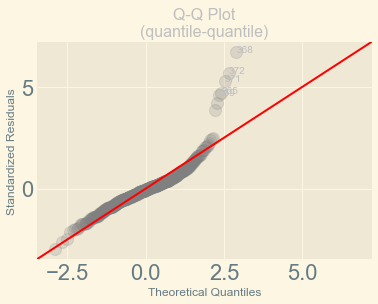

In [42]:
# statsmodels version
from statsmodels.graphics.gofplots import ProbPlot
probplot = ProbPlot(ols_norm_resid)
QQplot = probplot.qqplot(line='45', color='grey', alpha=0.2)# lw=1
plt.title('Q-Q Plot\n(quantile-quantile)')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Standardized Residuals')

# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(ols_norm_resid)), 0)
top5abs_norm_resid = abs_norm_resid[:5]

for r, i in enumerate(top5abs_norm_resid):
    plt.annotate(i, xy=(np.flip(probplot.theoretical_quantiles, 0)[r], ols_norm_resid[i]))

As we can see we've got several points a large distance from the red-line, suggesting our errors are of a non-normal distribution.

__Scale or Spread-Location Plot of the residuals__

Helps visualize the residual spread (scale) to determine whether they scale at a constant or equal range along the predicted values. This type of plot is a test of the assumption of equal variance (homoscedasticity). It’s good if you see a horizontal line with equal yet random dispersion of points.

>"Heteroskedasticity is when the variance of the error term, or the residual variance, is not constant across observations. Graphically, it means the spread of points around the regression line is variable."  - [source](http://bkenkel.com/psci8357/notes/05-ncv.html)

>"in linear regression, mean response and **predicted response are values of the dependent variable calculated from the regression parameters** and a given value of the independent variable. The values of these two responses are the same, but their calculated variances are different." [Wikipedia](https://en.wikipedia.org/wiki/Mean_and_predicted_response)

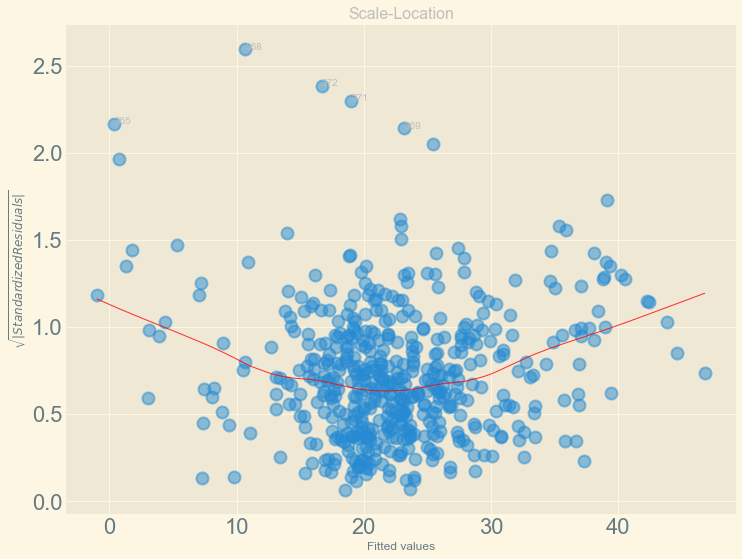

In [43]:
spread_loc_ols = plt.figure(figsize=(12,9))
plt.scatter(ols_fit_y, ols_absnorm_resid_sqrt, alpha=0.5);
sns.regplot(ols_fit_y, ols_absnorm_resid_sqrt,
            scatter=False,
            ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
spread_loc_ols.axes[0].set_title('Scale-Location')
spread_loc_ols.axes[0].set_xlabel('Fitted values')
spread_loc_ols.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

# annotations
absnorm_resid_sqrt = np.flip(np.argsort(ols_absnorm_resid_sqrt), 0)
absnorm_resid_sqrt_top_5 = absnorm_resid_sqrt[:5]
for i in absnorm_resid_sqrt_top_5:
    spread_loc_ols.axes[0].annotate(i, xy=(ols_fit_y[i],
                                      ols_absnorm_resid_sqrt[i]));

The residual spread is likely homoscedastic. As the LOWESS line runs more horizontal and paralel to x-axis. If the residual have a non-constant variance the LOWESS line will have a sideways “V” shape look to it. It appears with our plot, we have the highest residual values to the left and the right as opposed to to middle of the chart. Again, this suggests or indicated our model may not be fitting well to non-linear relationships as we determined earlier with the Residuals vs Fits chart above. For better predictive power, we may need to make further adjustments.
read-the-docs for further understanding

See, 1.[weighted least squares (WLS)](https://www.statsmodels.org/dev/examples/notebooks/generated/wls.html) method and **2.** _heteroscedastic-corrected covariance matrices (HCCM)_ for further fiddling relating Heteroskedasticity residual complexity.

1. weighted least squares method (WLS). One could use WLS IF you know the form of Heteroskedasticity. We adjust the specification with the weight function for each observation, so that adjusted error term uᵢ/√hᵢ has homoskedastic distribution. Using Statsmodels

       - WLS(residuals-array, regressors-array, weight)  # sm.WLS(y, X, weight=)

>"Weighted regression is a method that assigns each data point a weight based on the variance of its fitted value. The idea is to give small weights to observations associated with higher variances to shrink their squared residuals. Weighted regression minimizes the sum of the weighted squared residuals." - [statisticsbyjim.com](https://statisticsbyjim.com/regression/heteroscedasticity-regression/)

__Leverage Plot of the residuals__  - Used for identifying high leverage points in the model.

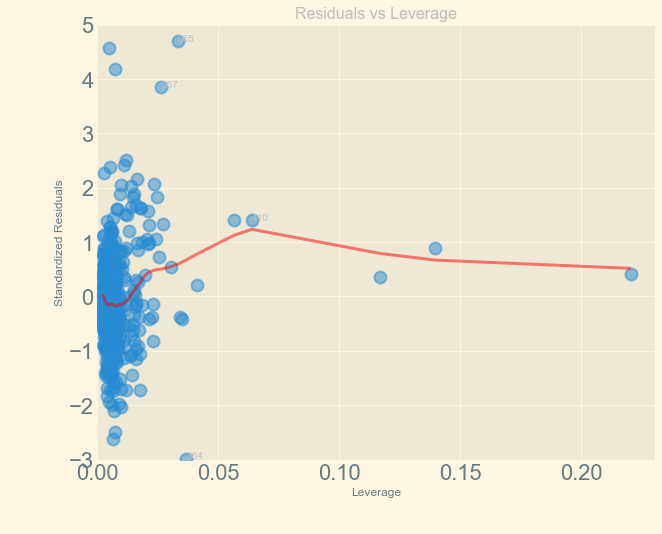

In [44]:
# leverage
ols_leverage = ols_model.get_influence().hat_matrix_diag
# cook's distance
ols_cooks = ols_model.get_influence().cooks_distance[0]

plt.figure(figsize=(10,8))
plt.scatter(ols_leverage, ols_norm_resid, alpha=0.5);
sns.regplot(ols_leverage, ols_norm_resid, scatter=False, ci=False, lowess=True,
            line_kws={'color': 'red', 'alpha': 0.5}) #'lw': 1
plt.xlim(0, max(ols_leverage)+0.01)
plt.ylim(-3, 5)
plt.title('Residuals vs Leverage')
plt.xlabel('Leverage')
plt.ylabel('Standardized Residuals')

# annotations
top5abs_norm_resid = np.flip(np.argsort(ols_cooks), 0)[:5]
for i in top5abs_norm_resid:
    plt.annotate(i,xy=(ols_leverage[i], ols_norm_resid[i]))